In [90]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
import nltk

In [91]:
mydata = pd.read_csv('twitter3.txt')
mydata.head()

,date,tweet
0,22-Mar-21,@bluemoondance74 @NASASpaceflight Going well. ...
1,21-Mar-21,@NASASpaceflight Hopefully will happen this de...
2,21-Mar-21,@newscientist True
3,21-Mar-21,@cleantechnica I am accumulating resources to ...
4,21-Mar-21,@CathieDWood When vast amounts of manufacturin...


In [92]:
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
mydata['Cleaned Tweets'] = mydata['tweet'].apply(clean)
mydata.head()

,date,tweet,Cleaned Tweets
0,22-Mar-21,@bluemoondance74 @NASASpaceflight Going well. ...,bluemoondance NASASpaceflight Going well Lot ...
1,21-Mar-21,@NASASpaceflight Hopefully will happen this de...,NASASpaceflight Hopefully will happen this de...
2,21-Mar-21,@newscientist True,newscientist True
3,21-Mar-21,@cleantechnica I am accumulating resources to ...,cleantechnica I am accumulating resources to ...
4,21-Mar-21,@CathieDWood When vast amounts of manufacturin...,CathieDWood When vast amounts of manufacturin...


Explanation:  “clean” is the function that takes text as input and returns the text without any punctuation marks or numbers in it. We applied it to the ‘review’ column and created a new column ‘Cleaned Tweets’ with the cleaned text. 

 

Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

In [93]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet

In [94]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

mydata['POS tagged'] = mydata['Cleaned Tweets'].apply(token_stop_pos)
mydata.head()

,date,tweet,Cleaned Tweets,POS tagged
0,22-Mar-21,@bluemoondance74 @NASASpaceflight Going well. ...,bluemoondance NASASpaceflight Going well Lot ...,"[(bluemoondance, n), (NASASpaceflight, n), (Go..."
1,21-Mar-21,@NASASpaceflight Hopefully will happen this de...,NASASpaceflight Hopefully will happen this de...,"[(NASASpaceflight, n), (Hopefully, n), (happen..."
2,21-Mar-21,@newscientist True,newscientist True,"[(newscientist, n), (True, n)]"
3,21-Mar-21,@cleantechnica I am accumulating resources to ...,cleantechnica I am accumulating resources to ...,"[(cleantechnica, n), (accumulating, v), (resou..."
4,21-Mar-21,@CathieDWood When vast amounts of manufacturin...,CathieDWood When vast amounts of manufacturin...,"[(CathieDWood, n), (vast, a), (amounts, n), (m..."


In [95]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

mydata['Lemma'] = mydata['POS tagged'].apply(lemmatize)
mydata.head()

,date,tweet,Cleaned Tweets,POS tagged,Lemma
0,22-Mar-21,@bluemoondance74 @NASASpaceflight Going well. ...,bluemoondance NASASpaceflight Going well Lot ...,"[(bluemoondance, n), (NASASpaceflight, n), (Go...",bluemoondance NASASpaceflight Going well Lot...
1,21-Mar-21,@NASASpaceflight Hopefully will happen this de...,NASASpaceflight Hopefully will happen this de...,"[(NASASpaceflight, n), (Hopefully, n), (happen...",NASASpaceflight Hopefully happen decade
2,21-Mar-21,@newscientist True,newscientist True,"[(newscientist, n), (True, n)]",newscientist True
3,21-Mar-21,@cleantechnica I am accumulating resources to ...,cleantechnica I am accumulating resources to ...,"[(cleantechnica, n), (accumulating, v), (resou...",cleantechnica accumulate resource help make ...
4,21-Mar-21,@CathieDWood When vast amounts of manufacturin...,CathieDWood When vast amounts of manufacturin...,"[(CathieDWood, n), (vast, a), (amounts, n), (m...",CathieDWood vast amount manufacturing need r...


In [96]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(review):
        return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [97]:
fin_data = pd.DataFrame(mydata[['date', 'tweet', 'Lemma']])

In [98]:
fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,date,tweet,Lemma,Subjectivity,Polarity,Analysis
0,22-Mar-21,@bluemoondance74 @NASASpaceflight Going well. ...,bluemoondance NASASpaceflight Going well Lot...,0.350000,-0.050000,Negative
1,21-Mar-21,@NASASpaceflight Hopefully will happen this de...,NASASpaceflight Hopefully happen decade,0.000000,0.000000,Neutral
2,21-Mar-21,@newscientist True,newscientist True,0.650000,0.350000,Positive
3,21-Mar-21,@cleantechnica I am accumulating resources to ...,cleantechnica accumulate resource help make ...,0.700000,0.400000,Positive
4,21-Mar-21,@CathieDWood When vast amounts of manufacturin...,CathieDWood vast amount manufacturing need r...,0.716667,0.166667,Positive


In [99]:
tb_counts = fin_data.Analysis.value_counts()

tb_counts

Positive    5565
Neutral     5122
Negative    1652
Name: Analysis, dtype: int64

In [100]:
fin_data.shape

(12339, 6)

In [101]:
i = fin_data[(fin_data.Analysis == 'Neutral')].index
tesla = fin_data.drop(i)
tesla

,date,tweet,Lemma,Subjectivity,Polarity,Analysis
0,22-Mar-21,@bluemoondance74 @NASASpaceflight Going well. ...,bluemoondance NASASpaceflight Going well Lot...,0.350000,-0.050000,Negative
2,21-Mar-21,@newscientist True,newscientist True,0.650000,0.350000,Positive
3,21-Mar-21,@cleantechnica I am accumulating resources to ...,cleantechnica accumulate resource help make ...,0.700000,0.400000,Positive
4,21-Mar-21,@CathieDWood When vast amounts of manufacturin...,CathieDWood vast amount manufacturing need r...,0.716667,0.166667,Positive
8,21-Mar-21,@SciGuySpace Not quite how I would tell the st...,SciGuySpace quite would tell story probably ...,0.100000,0.300000,Positive
...,...,...,...,...,...,...
12331,21-Dec-11,Sam Harris also wrote a nice piece on the awes...,Sam Harris also write nice piece awesomeness...,0.800000,0.650000,Positive
12332,21-Dec-11,"Read ""Lying"", the new book by my friend Sam Ha...",Read Lying new book friend Sam Harris Excell...,0.684848,0.612121,Positive
12333,4-Dec-11,Am reading a great biography of Ben Franklin b...,read great biography Ben Franklin Isaacson H...,0.645000,0.480000,Positive
12335,3-Dec-11,"Great Voltaire quote, arguably better than Twa...",Great Voltaire quote arguably well Twain Hea...,0.700000,0.575000,Positive


In [102]:
tesla.set_index('date')

,tweet,Lemma,Subjectivity,Polarity,Analysis
date,,,,,
22-Mar-21,@bluemoondance74 @NASASpaceflight Going well. ...,bluemoondance NASASpaceflight Going well Lot...,0.350000,-0.050000,Negative
21-Mar-21,@newscientist True,newscientist True,0.650000,0.350000,Positive
21-Mar-21,@cleantechnica I am accumulating resources to ...,cleantechnica accumulate resource help make ...,0.700000,0.400000,Positive
21-Mar-21,@CathieDWood When vast amounts of manufacturin...,CathieDWood vast amount manufacturing need r...,0.716667,0.166667,Positive
21-Mar-21,@SciGuySpace Not quite how I would tell the st...,SciGuySpace quite would tell story probably ...,0.100000,0.300000,Positive
...,...,...,...,...,...
21-Dec-11,Sam Harris also wrote a nice piece on the awes...,Sam Harris also write nice piece awesomeness...,0.800000,0.650000,Positive
21-Dec-11,"Read ""Lying"", the new book by my friend Sam Ha...",Read Lying new book friend Sam Harris Excell...,0.684848,0.612121,Positive
4-Dec-11,Am reading a great biography of Ben Franklin b...,read great biography Ben Franklin Isaacson H...,0.645000,0.480000,Positive


In [103]:
tesla['date'] = pd.to_datetime(tesla['date'])
tesla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7217 entries, 0 to 12337
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          7217 non-null   datetime64[ns]
 1   tweet         7217 non-null   object        
 2   Lemma         7217 non-null   object        
 3   Subjectivity  7217 non-null   float64       
 4   Polarity      7217 non-null   float64       
 5   Analysis      7217 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 394.7+ KB


In [104]:
tesla_by_month = tesla[['date', 'Polarity']]
tesla_by_month.set_index('date',inplace=True)
tesla_by_month


,Polarity
date,
2021-03-22,-0.050000
2021-03-21,0.350000
2021-03-21,0.400000
2021-03-21,0.166667
2021-03-21,0.300000
...,...
2011-12-21,0.650000
2011-12-21,0.612121
2011-12-04,0.480000


In [105]:
tesla_monthly_polarity = tesla_by_month.resample('M').mean()
tesla_monthly_polarity

,Polarity
date,
2011-12-31,0.183428
2012-01-31,0.216015
2012-02-29,0.240788
2012-03-31,0.380189
2012-04-30,0.249976
...,...
2020-11-30,0.191398
2020-12-31,0.215628
2021-01-31,0.244285


In [106]:
import numpy as np
import pandas as pd


In [107]:
df = pd.read_csv("TSLA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/29/2010,3.80,5.00,3.51,4.78,4.78,93831500.0
1,6/30/2010,5.16,6.08,4.66,4.77,4.77,85935500.0
2,7/1/2010,5.00,5.18,4.05,4.39,4.39,41094000.0
3,7/2/2010,4.60,4.62,3.74,3.84,3.84,25699000.0
4,7/6/2010,4.00,4.00,3.17,3.22,3.22,34334500.0
...,...,...,...,...,...,...,...
2908,1/14/2022,1019.88,1052.00,1013.38,1049.61,1049.61,24246600.0
2909,1/18/2022,1026.61,1070.79,1016.06,1030.51,1030.51,22247800.0
2910,1/19/2022,1041.71,1054.67,995.00,995.65,995.65,25147500.0
2911,1/20/2022,1009.73,1041.66,994.00,996.27,996.27,23496200.0


In [108]:
#convert date into datetime for later resampling purposes 
df['Date'] = df.loc[:,'Date'].astype('datetime64[ns]')

df = df[['Date','Adj Close']]
df.set_index('Date',inplace=True)
print(df)

            Adj Close
Date                 
2010-06-29       4.78
2010-06-30       4.77
2010-07-01       4.39
2010-07-02       3.84
2010-07-06       3.22
...               ...
2022-01-14    1049.61
2022-01-18    1030.51
2022-01-19     995.65
2022-01-20     996.27
2022-01-21     943.90

[2913 rows x 1 columns]


In [109]:
df_Monthly_Price = df.resample('M').mean()
df_Monthly_Price

,Adj Close
Date,
2010-06-30,4.775000
2010-07-31,3.911429
2010-08-31,3.902273
2010-09-30,4.147619
2010-10-31,4.143333
...,...
2021-09-30,753.952381
2021-10-31,878.349048
2021-11-30,1120.662381


In [110]:
price = df_Monthly_Price["Adj Close"]

simple_return = price.pct_change()

log_return = np.log(1+simple_return)

In [111]:
log_return.to_frame()

,Adj Close
Date,
2010-06-30,NaN
2010-07-31,-0.199491
2010-08-31,-0.002344
2010-09-30,0.060975
2010-10-31,-0.001034
...,...
2021-09-30,0.066787
2021-10-31,0.152715
2021-11-30,0.243631


In [112]:
tesla_complet = tesla_monthly_polarity.join(log_return)                    

In [113]:
tesla_complet

,Polarity,Adj Close
date,,
2011-12-31,0.183428,-0.067859
2012-01-31,0.216015,-0.086763
2012-02-29,0.240788,0.175644
2012-03-31,0.380189,0.072923
2012-04-30,0.249976,-0.050737
...,...,...
2020-11-30,0.191398,0.086079
2020-12-31,0.215628,0.316267
2021-01-31,0.244285,0.260330


In [114]:
tesla_complet['Polarity'].corr(tesla_complet['Adj Close'])

0.05033910991835018

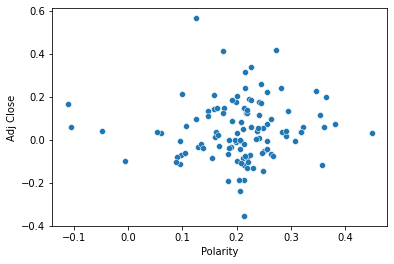

In [115]:
import seaborn as sns
sns.scatterplot(x="Polarity", y="Adj Close", data=tesla_complet);

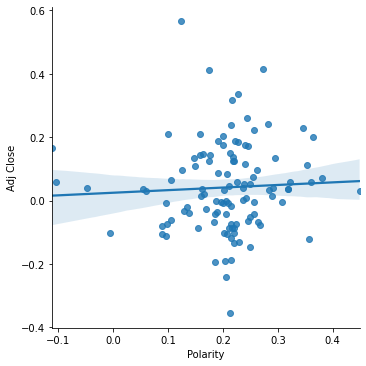

In [116]:
sns.lmplot(x="Polarity", y="Adj Close", data=tesla_complet)

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
dataset = tesla_complet

In [119]:
dataset.describe()

,Polarity,Adj Close
count,111.000000,112.000000
mean,0.204424,0.041326
std,0.087112,0.140951
min,-0.110917,-0.355083
25%,0.166680,-0.061586
50%,0.212803,0.033106
75%,0.245529,0.128179
max,0.449167,0.565615


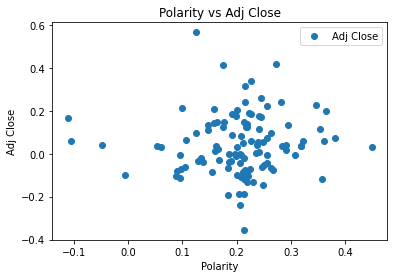

In [120]:
dataset.plot(x = 'Polarity', y = 'Adj Close', style = 'o')
plt.title('Polarity vs Adj Close')
plt.xlabel('Polarity')
plt.ylabel('Adj Close')
plt.show()

In [121]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [122]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)

0.03453117316091469


In [123]:
print(regressor.coef_)

[0.0193476]
